# Cours "Géomatique"
### Louis Maritaud
### louis.maritaud@unilim.fr

## Objectifs pédagogiques
- Comprendre la structure d'un GeoDataFrame
- Lire et manipuler des fichiers géographiques
- Maîtriser les bases des systèmes de coordonnées (CRS)
- Créer des cartes simples avec matplotlib


## Partie Théorique

### 1. Introduction à GeoPandas

**Qu'est-ce que GeoPandas ?**
- Extension de Pandas pour les données géographiques
- Même syntaxe que Pandas + colonne spéciale `geometry`
- Supporte shapefile, GeoJSON, GeoPackage, etc.
- Intégration avec matplotlib pour la visualisation

In [11]:
pip install geopandas matplotlib contextily

  Using cached contextily-1.7.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl.metadata (4.8 kB)
  Using cached rasterio-1.5.0-cp313-cp313-win_amd64.whl.metadata (8.9 kB)
  Using cached geographiclib-2.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 52.3 MB/s  0:00:00
Using cached contextily-1.7.0-py3-none-any.whl (16 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 62.3 MB/s  0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 11.0/11.0 MB 74.6 MB/s  0:00:00
   ---------------------------------------- 0.0/22

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [21]:
#Installation et imports
# Installation (à faire une fois)
#pip install geopandas matplotlib contextily

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Construction d'un DataFrame classique 
df = pd.DataFrame({
    'ville': ['Paris', 'Lyon', 'Marseille', 'Toulouse', 'Limoges'],
    'population': [2103778, 519127, 877215, 514819, 129754], # Données Wikipédia
    'latitude': [48.8566, 45.7640, 43.2965, 43.6048, 45.849998],
    'longitude': [2.3522, 4.8357, 5.3698, 1.4428, 1.25]
})

print(f"Notre DataFrame classique : \n{df}")

Notre DataFrame classique : 
       ville  population   latitude  longitude
0      Paris     2103778  48.856600     2.3522
1       Lyon      519127  45.764000     4.8357
2  Marseille      877215  43.296500     5.3698
3   Toulouse      514819  43.604800     1.4428
4    Limoges      129754  45.849998     1.2500


       ville  population   latitude  longitude                geometry
0      Paris     2103778  48.856600     2.3522  POINT (2.3522 48.8566)
1       Lyon      519127  45.764000     4.8357   POINT (4.8357 45.764)
2  Marseille      877215  43.296500     5.3698  POINT (5.3698 43.2965)
3   Toulouse      514819  43.604800     1.4428  POINT (1.4428 43.6048)
4    Limoges      129754  45.849998     1.2500      POINT (1.25 45.85)

Colonne geometry :
0    POINT (2.3522 48.8566)
1     POINT (4.8357 45.764)
2    POINT (5.3698 43.2965)
3    POINT (1.4428 43.6048)
4        POINT (1.25 45.85)
Name: geometry, dtype: geometry

Type de la colonne geometry :<class 'geopandas.geoseries.GeoSeries'>


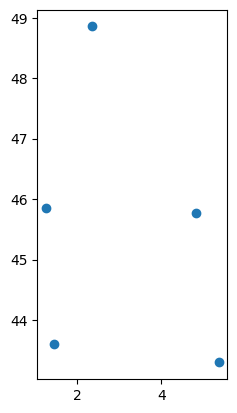

In [22]:
# Conversion en GeoDataFrame
# Créer des géométries Point à partir des coordonnées → points_from_xy
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"  # Système de coordonnées WGS84
)

print(gdf)
print(f"\nColonne geometry :\n{gdf.geometry}")
print(f"\nType de la colonne geometry :{type(gdf.geometry)}")

gdf.plot()
plt.show()


<Axes: >

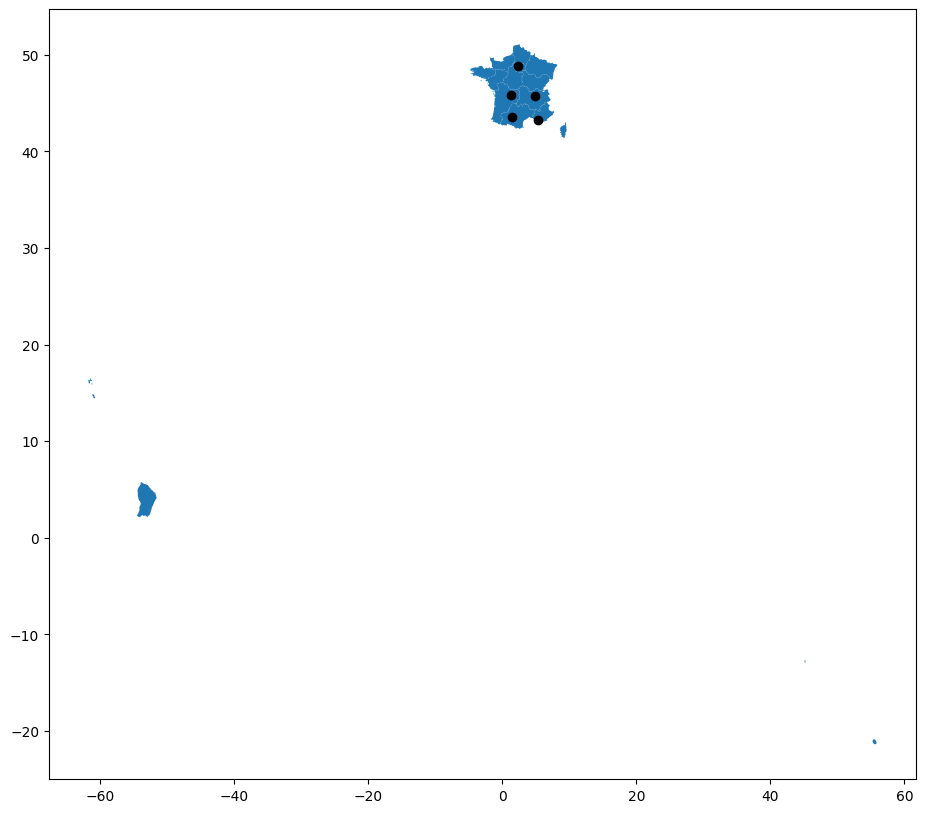

In [23]:
# Ajout du geojson des régions : 
gdf_regions=gpd.read_file("DATA/regions.geojson") #On lit le geojson et on en fait un geodataframe
ax = gdf_regions.plot(figsize=(20, 10)) # On créé un premier plot à partir du geojson
gdf.plot(ax=ax, color="black") # On ajout à ce premier plot nos points

## Quels types de géométrie pour GéoPandas ? 

- **Point** : un lieu précis (== coordonnée unique)
- **LineString** : une ligne (== succession de points)
- **Polygon** : une surface fermée
- **MultiPoint, MultiLineString, MultiPolygon** : collections de géométries, respectivement plusieurs points ; plusieurs lignes ; plusieurs polygones.

**Exemples :**

In [24]:
from shapely.geometry import Point, LineString, Polygon
import contextily as cx 

# Géométries en lon/lat
point = Point(2.3522, 48.8566)  # Paris
ligne = LineString([(2.3522, 48.8566), (4.8357, 45.7640)])  # Paris-Lyon

# Polygone autour de Paris
polygone = Polygon([
    (2.2, 48.8),
    (2.6, 48.8),
    (2.4, 49.0)
])

# Création en EPSG:4326
gdf = gpd.GeoDataFrame(
    {'nom': ['Point', 'Ligne', 'Polygone'],
     'geometry': [point, ligne, polygone]},
    crs="EPSG:4326"
)

gdf

,nom,geometry
0,Point,POINT (2.3522 48.8566)
1,Ligne,"LINESTRING (2.3522 48.8566, 4.8357 45.764)"
2,Polygone,"POLYGON ((2.2 48.8, 2.6 48.8, 2.4 49, 2.2 48.8))"


### 3. Systèmes de coordonnées - CRS (Coordinate Reference System)

**Les essentiels à retenir** :

| EPSG Code | Nom | Unité | Usage |
|-----------|-----|-------|-------|
| **4326** | WGS84 | degrés | GPS, **Folium**, coordonnées géographiques |
| **2154** | Lambert 93 | mètres | France, **calculs de distances/aires** |
| **3857** | Web Mercator | mètres | Fonds de carte web (Google Maps, OSM) |

In [25]:
# Vérifier le CRS actuel
print(gdf.crs)

# Changer de projection (reprojection)
gdf_lambert = gdf.to_crs("EPSG:2154")
print(f"CRS original : {gdf.crs}")
print(f"CRS après reprojection : {gdf_lambert.crs}")

# Comparaison des coordonnées
print("\nCoordonnées en WGS84 (degrés) :")
print(gdf.geometry.head())

print("\nCoordonnées en Lambert 93 (mètres) :")
print(gdf_lambert.geometry.head())

EPSG:4326
CRS original : EPSG:4326
CRS après reprojection : EPSG:2154

Coordonnées en WGS84 (degrés) :
0                              POINT (2.3522 48.8566)
1          LINESTRING (2.3522 48.8566, 4.8357 45.764)
2    POLYGON ((2.2 48.8, 2.6 48.8, 2.4 49, 2.2 48.8))
Name: geometry, dtype: geometry

Coordonnées en Lambert 93 (mètres) :
0                       POINT (652469.023 6862035.259)
1    LINESTRING (652469.023 6862035.259, 842666.659...
2    POLYGON ((641238.249 6855844.482, 670618.748 6...
Name: geometry, dtype: geometry


In [26]:
# Calcul de distance en WGS84 (FAUX !)
paris = Point(2.3522, 48.8566)
limoges = Point(1.25, 45.849998)
distance_deg = paris.distance(limoges)
print(f"Distance en degrés (incorrect) : {distance_deg:.4f}°")

# Calcul de distance en Lambert 93 (CORRECT !)
gdf_villes = gpd.GeoDataFrame({
    'ville': ['Paris', 'Limoges'],
    'geometry': [paris, limoges]
}, crs="EPSG:4326")

gdf_villes_proj = gdf_villes.to_crs("EPSG:2154")
distance_m = gdf_villes_proj.geometry[0].distance(gdf_villes_proj.geometry[1])
print(f"Distance en mètres (correct) : {distance_m:.1f} m")
#Conversion directe des mètres en kilomètres :
print(f"Distance en kilomètres (correct) : {distance_m/1000:.1f} km")
# Résultat attendu : ~345 km

Distance en degrés (incorrect) : 3.2023°
Distance en mètres (correct) : 344223.0 m
Distance en kilomètres (correct) : 344.2 km


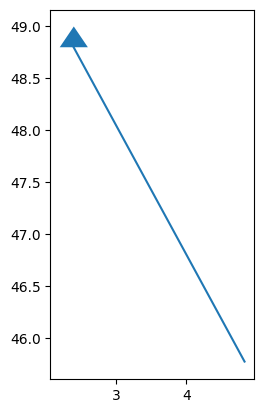

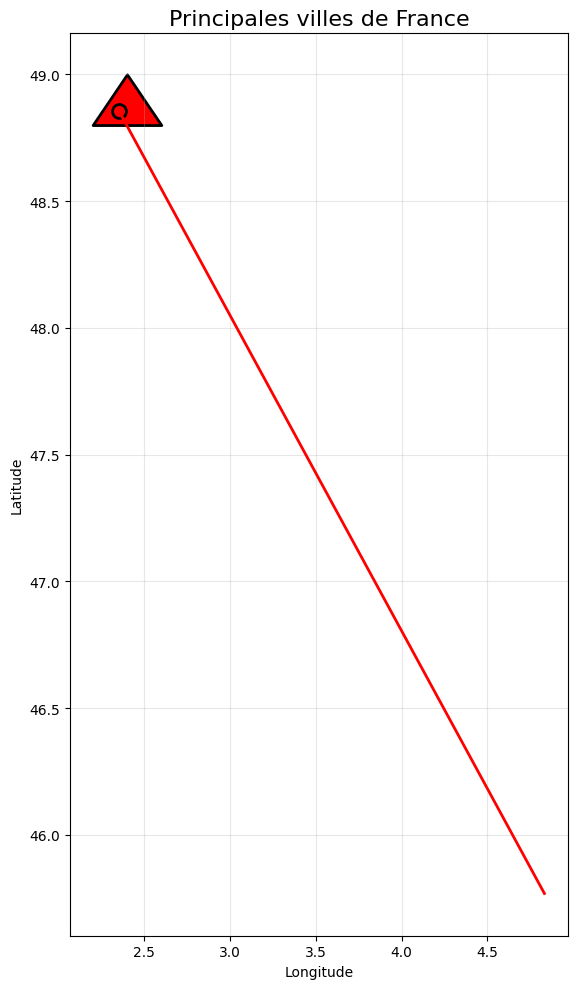

KeyError: 'population'

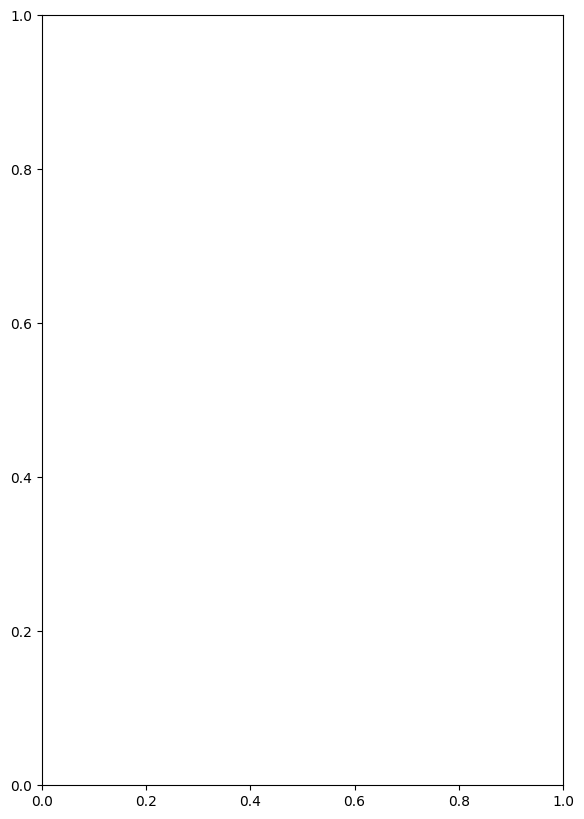

In [27]:
# Cartes simples avec `.plot()` :
# Carte basique
gdf.plot()
plt.show()

# Carte avec options
gdf.plot(
    figsize=(12, 10),  # Taille de la figure
    color='red',        # Couleur
    markersize=100,     # Taille des points
    edgecolor='black',  # Contour
    linewidth=2         # Épaisseur du contour
)
plt.title("Principales villes de France", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Personnalisation avancée
# Carte avec légende et couleurs selon une variable
fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(
    ax=ax,
    column='population',  # Colorier selon la population
    cmap='YlOrRd',        # Palette de couleurs
    legend=True,
    markersize=200,
    edgecolor='black',
    legend_kwds={'label': "Population"}
)

plt.title("Population des villes françaises")
plt.axis('off')  # Masquer les axes
plt.tight_layout()
plt.show()

In [41]:
import geopandas as gpd
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Charger les contours des départements depuis data.gouv.fr

url = "https://www.data.gouv.fr/fr/datasets/r/90b9341a-e1f7-4d75-a73c-bbc010c7feeb"

r = requests.get(url, verify=True)
r.raise_for_status()


departements = gpd.read_file(url_depts)

# Explorer les données
print("Premières lignes :")
print(departements.head())

print("\nColonnes disponibles :")
print(departements.columns.tolist())

print(f"\nSystème de coordonnées : {departements.crs}")
print(f"Nombre de départements : {len(departements)}")

# Types de géométries
print("\nTypes de géométries :")
print(departements.geometry.type.value_counts())

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1032)>

In [ ]:
# Carte de France simple
fig, ax = plt.subplots(figsize=(12, 12))
departements.plot(ax=ax, edgecolor='black', facecolor='lightblue')
plt.title("Départements français", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Afficher quelques noms de départements
print("\nPremiers départements :")
print(departements['nom'].head(15))

# Statistiques sur les géométries
print(f"\nSuperficie totale : {departements.geometry.area.sum():.2f} degrés²")

In [28]:
# Méthode 1 : Filtrer par noms de départements
departements_na = ['Dordogne', 'Gironde', 'Landes', 'Lot-et-Garonne', 
                   'Pyrénées-Atlantiques', 'Deux-Sèvres', 'Vienne', 
                   'Haute-Vienne', 'Charente', 'Charente-Maritime', 
                   'Corrèze', 'Creuse']

nouvelle_aquitaine = departements[departements['nom'].isin(departements_na)]

print(f"Nombre de départements en Nouvelle-Aquitaine : {len(nouvelle_aquitaine)}")

# Visualiser
fig, ax = plt.subplots(figsize=(10, 10))
nouvelle_aquitaine.plot(ax=ax, edgecolor='black', facecolor='#90EE90')
plt.title("Nouvelle-Aquitaine", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Méthode 2 : Si un code région existe
# nouvelle_aquitaine = departements[departements['code_region'] == '75']

NameError: name 'departements' is not defined

## A vous 
- Filtrer une autre région (Bretagne, PACA, etc.)
- Compter le nombre de départements par région
- Identifier le plus grand département (en superficie)

In [29]:
# Solution : Plus grand département
departements_proj = departements.to_crs("EPSG:2154")
departements_proj['superficie_km2'] = departements_proj.geometry.area / 1_000_000

plus_grand = departements_proj.loc[departements_proj['superficie_km2'].idxmax()]
print(f"Plus grand département : {plus_grand['nom']} ({plus_grand['superficie_km2']:.0f} km²)")

NameError: name 'departements' is not defined

## Ajouter des données de population

In [30]:
# Convertir en DataFrame
pop_df = pd.DataFrame(
    list(population_data.items()), 
    columns=['nom', 'population']
)

print("Données de population :")
print(pop_df)

# Jointure avec le GeoDataFrame
nouvelle_aquitaine = nouvelle_aquitaine.merge(
    pop_df, 
    on='nom', 
    how='left'
)

print("\nGeoDataFrame enrichi :")
print(nouvelle_aquitaine[['nom', 'population']])

# Vérifier s'il y a des valeurs manquantes
if nouvelle_aquitaine['population'].isna().any():
    print("Attention : certains départements n'ont pas de population !")
    print(nouvelle_aquitaine[nouvelle_aquitaine['population'].isna()]['nom'])

NameError: name 'population_data' is not defined

## Carte choroplèthe

NameError: name 'nouvelle_aquitaine' is not defined

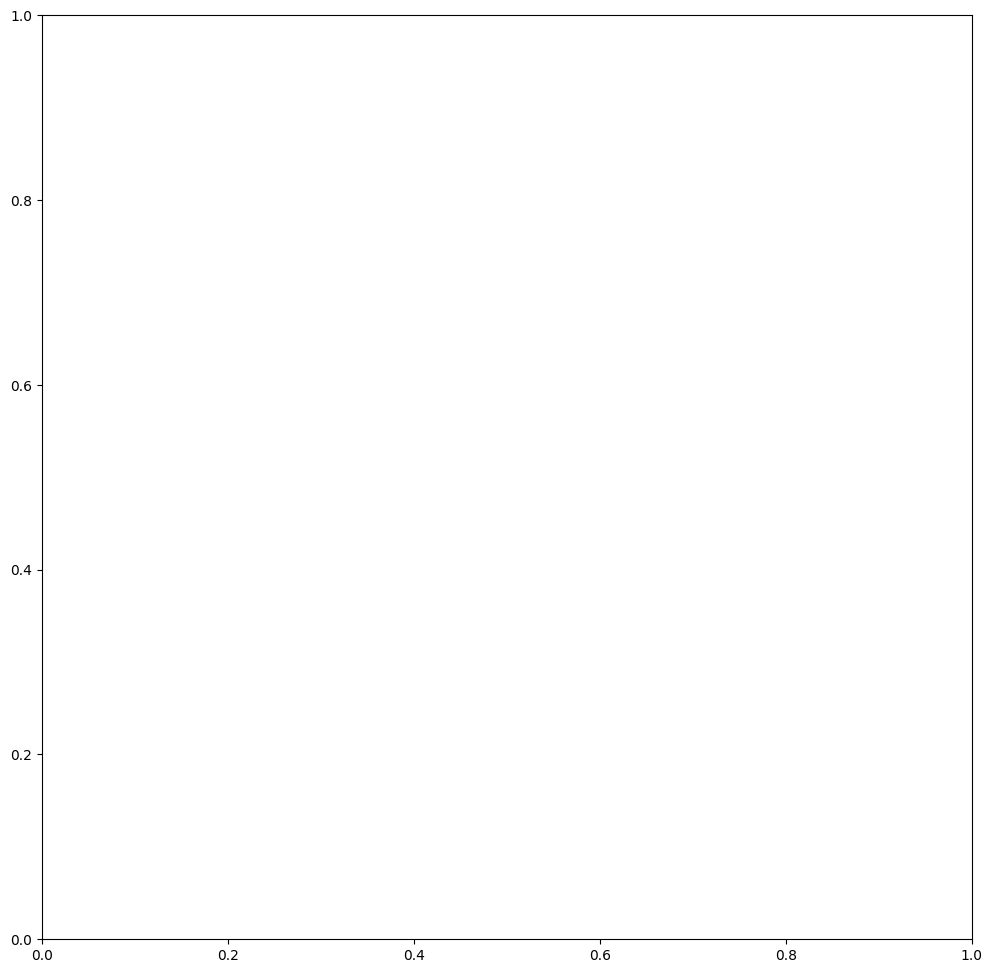

In [31]:
# Carte avec gradient de couleurs selon la population
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

nouvelle_aquitaine.plot(
    column='population',     # Variable à visualiser
    cmap='YlOrRd',          # Palette : jaune → orange → rouge
    legend=True,
    edgecolor='black',
    linewidth=0.8,
    ax=ax,
    legend_kwds={
        'label': "Population",
        'orientation': "horizontal",
        'shrink': 0.5
    }
)

plt.title("Population par département - Nouvelle-Aquitaine", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

In [32]:
# Ajout des départements 
# Calculer les centroïdes (centres) des polygones
nouvelle_aquitaine['centroid'] = nouvelle_aquitaine.geometry.centroid

fig, ax = plt.subplots(1, 1, figsize=(14, 12))

nouvelle_aquitaine.plot(
    column='population', 
    cmap='YlOrRd', 
    legend=True,
    edgecolor='black',
    linewidth=0.8,
    ax=ax
)

# Ajouter les labels au centre de chaque département
for idx, row in nouvelle_aquitaine.iterrows():
    plt.annotate(
        text=row['nom'], 
        xy=(row['centroid'].x, row['centroid'].y),
        horizontalalignment='center',
        fontsize=9,
        weight='bold',
        color='darkblue'
    )

plt.title("Population par département - Nouvelle-Aquitaine", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

NameError: name 'nouvelle_aquitaine' is not defined

In [33]:
## Variables manuelles, bins et classes 

In [34]:
import matplotlib.colors as mcolors

# Définir des classes
bins = [0, 300000, 500000, 1000000, 2000000]
labels = ['< 300k', '300-500k', '500k-1M', '> 1M']

nouvelle_aquitaine['classe_pop'] = pd.cut(
    nouvelle_aquitaine['population'], 
    bins=bins, 
    labels=labels
)

# Carte avec classes discrètes
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

nouvelle_aquitaine.plot(
    column='classe_pop',
    categorical=True,
    legend=True,
    edgecolor='black',
    linewidth=0.8,
    cmap='RdYlGn_r',  # Inversé : rouge = forte pop
    ax=ax
)

plt.title("Classes de population - Nouvelle-Aquitaine", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

NameError: name 'nouvelle_aquitaine' is not defined

In [35]:
# Calculer la densité (habitants/km²)
nouvelle_aquitaine_proj = nouvelle_aquitaine.to_crs("EPSG:2154")
nouvelle_aquitaine_proj['superficie_km2'] = (
    nouvelle_aquitaine_proj.geometry.area / 1_000_000
)
nouvelle_aquitaine_proj['densite'] = (
    nouvelle_aquitaine_proj['population'] / 
    nouvelle_aquitaine_proj['superficie_km2']
)

# Cartographier
fig, ax = plt.subplots(figsize=(12, 12))
nouvelle_aquitaine_proj.plot(
    column='densite',
    cmap='plasma',
    legend=True,
    edgecolor='black',
    ax=ax,
    legend_kwds={'label': "Densité (hab/km²)"}
)
plt.title("Densité de population")
plt.axis('off')
plt.show()

# Statistiques
print(f"Densité moyenne : {nouvelle_aquitaine_proj['densite'].mean():.1f} hab/km²")
print(f"Département le plus dense : {nouvelle_aquitaine_proj.loc[nouvelle_aquitaine_proj['densite'].idxmax(), 'nom']}")
print(f"Département le moins dense : {nouvelle_aquitaine_proj.loc[nouvelle_aquitaine_proj['densite'].idxmin(), 'nom']}")

NameError: name 'nouvelle_aquitaine' is not defined

In [36]:
# Filtrer une autre région (ex: Bretagne)
bretagne_depts = ['Côtes-d\'Armor', 'Finistère', 'Ille-et-Vilaine', 'Morbihan']
bretagne = departements[departements['nom'].isin(bretagne_depts)]

# Comparer les populations totales
pop_na = nouvelle_aquitaine['population'].sum()
pop_bretagne = bretagne['population'].sum() if 'population' in bretagne.columns else 0

print(f"Population Nouvelle-Aquitaine : {pop_na:,.0f}")
print(f"Population Bretagne : {pop_bretagne:,.0f}")

NameError: name 'departements' is not defined